<strong>Semi-major axis (a)</strong>

$\alpha = tan^{-1}\bigg(\frac{esin(\nu)}{1+ecos(\nu)}\bigg)$; 
$\beta = 0$

<strong>Eccentricity (e)</strong>

$\alpha = tan^{-1}\bigg(\frac{sin(\nu)}{cos(\nu)+cos(E)}\bigg)$; 
$\beta = 0$

<strong>Inclination (i)</strong>

$\alpha = 0$; 
$\beta = sgn(cos(\omega+\nu))\cdot\frac{\pi}{2}$

<strong>RAAN ($\Omega$)</strong>

$\alpha = 0$; 
$\beta = sgn(sin(\omega+\nu))\cdot\frac{\pi}{2}$

<strong>Argument of perigee ($\omega$)</strong>

$\alpha = tan^{-1}\bigg(\frac{1+ecos(\nu)}{2+ecos(\nu)}cot({\nu})\bigg)$; 
$\beta = tan^{-1}\bigg(\frac{ecot(i)sin(\omega+\nu)}{sin(\alpha-\nu)(1+ecos(\nu)-cos(\alpha)sin(\nu)}\bigg)$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

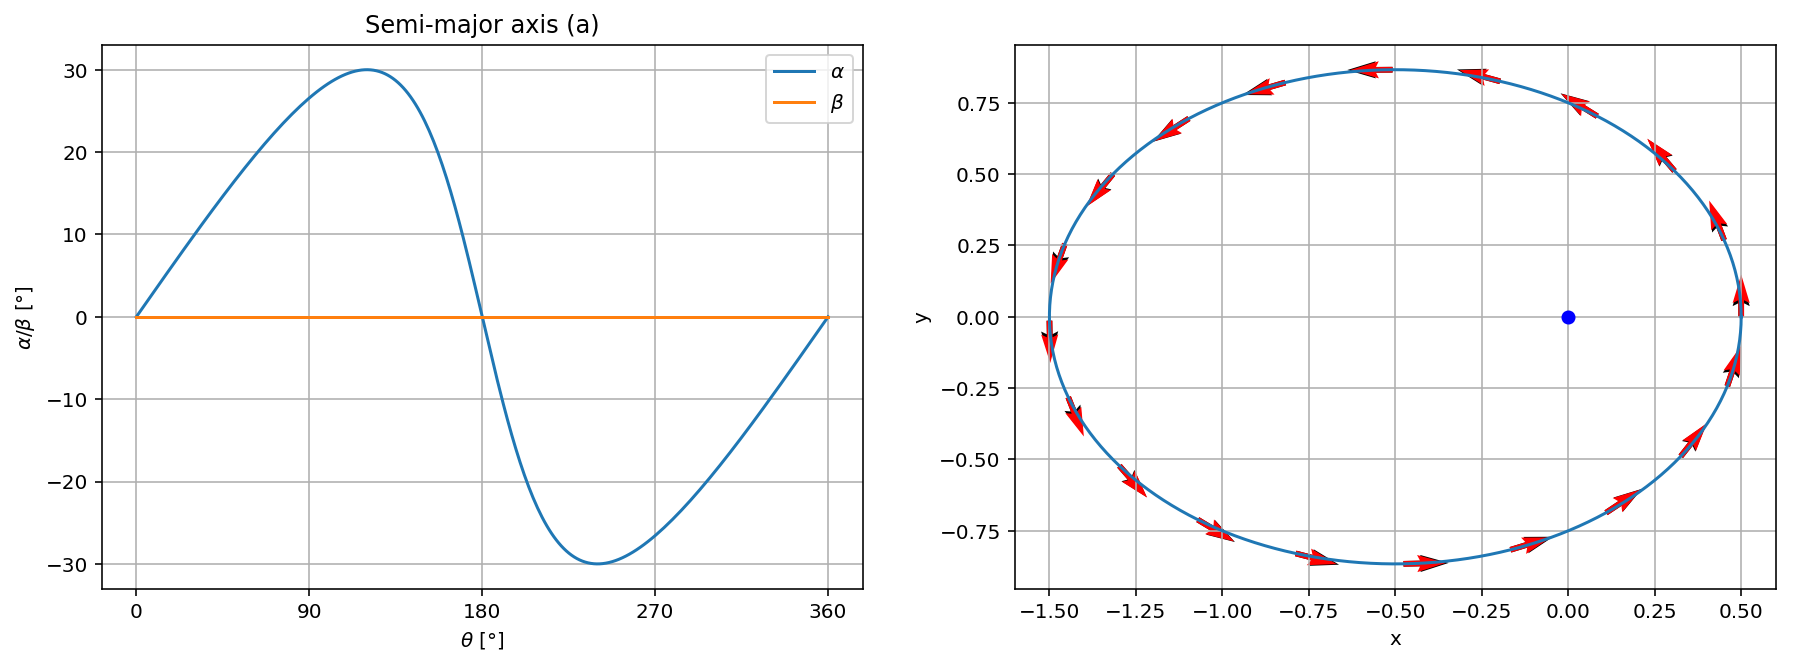

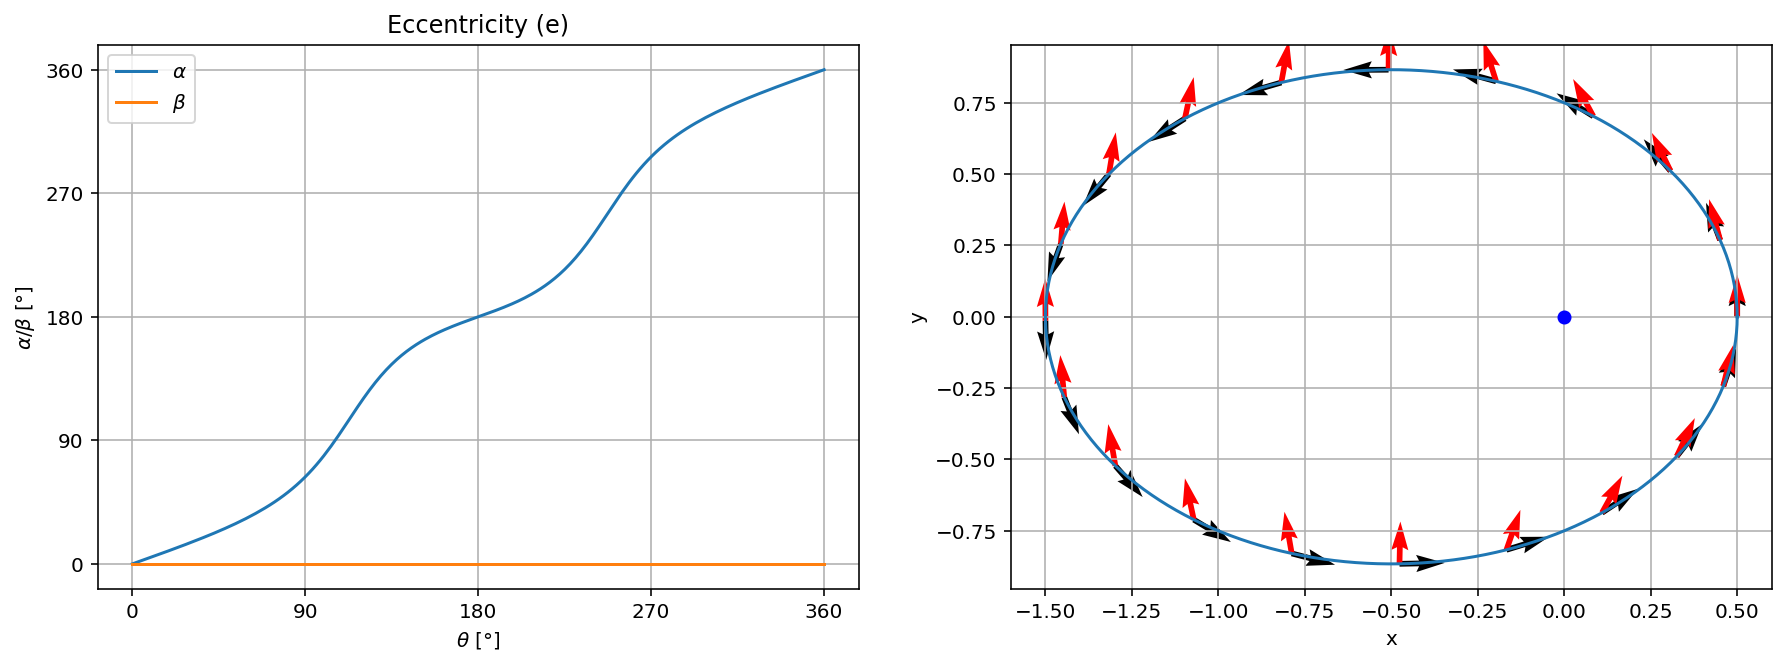

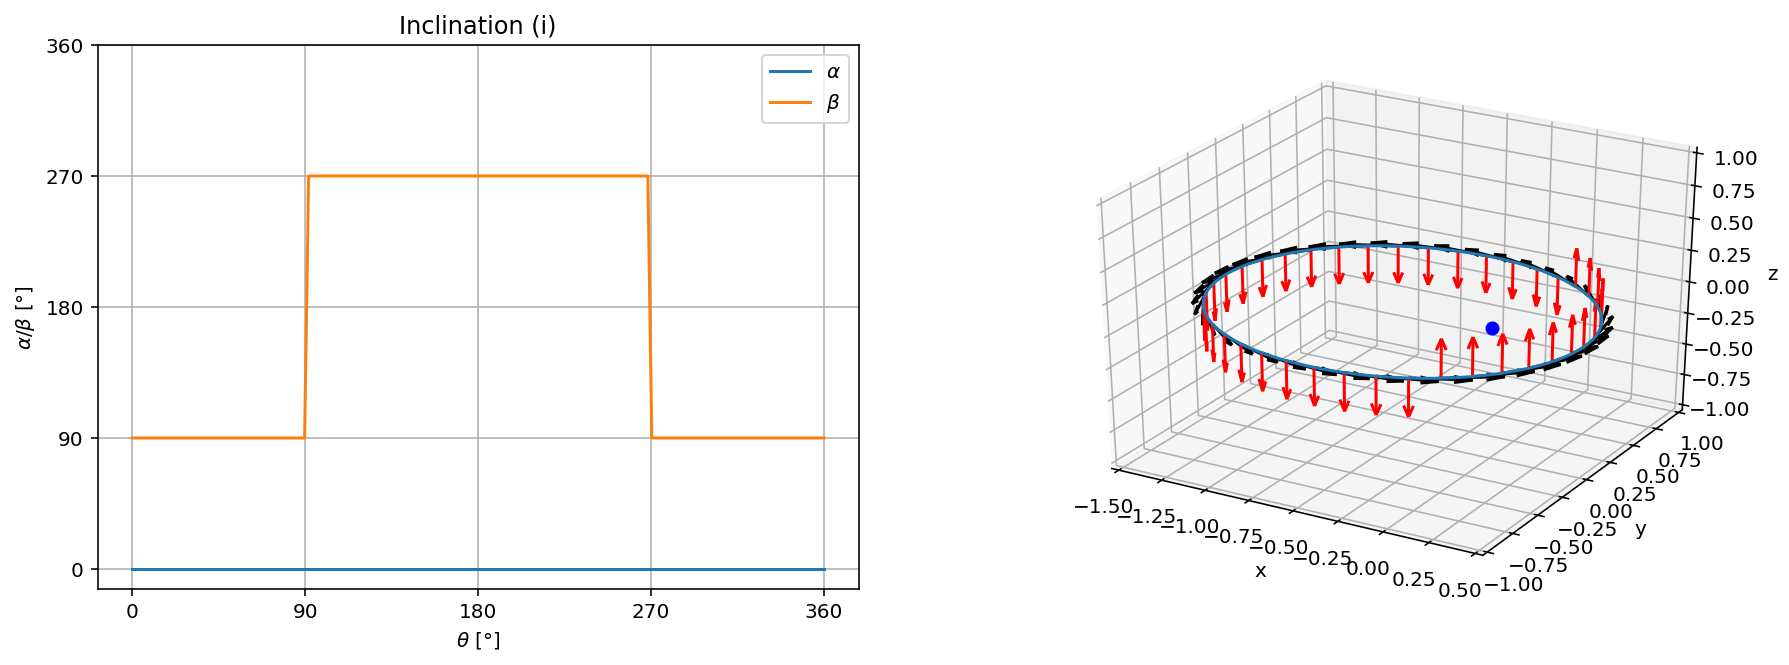

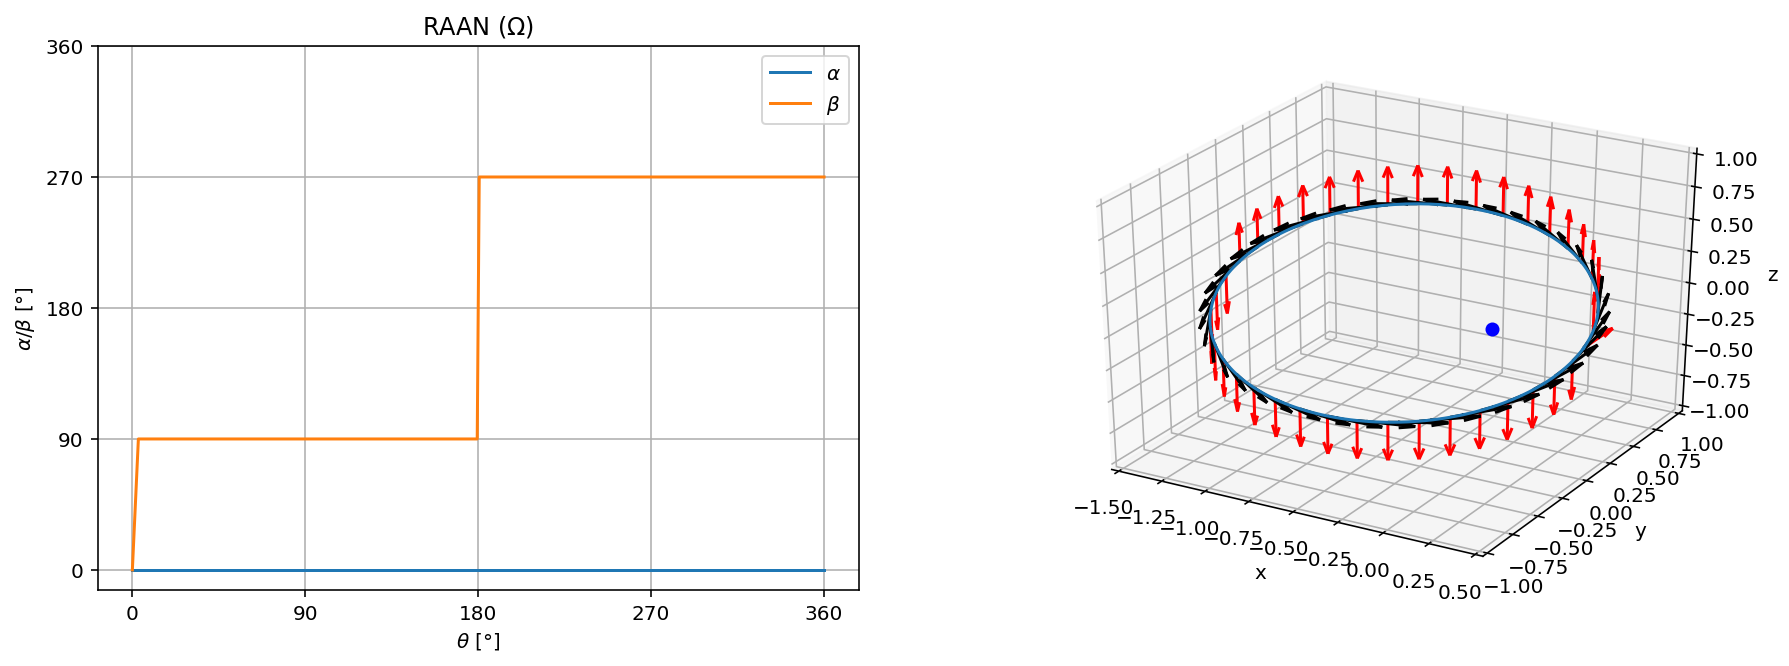

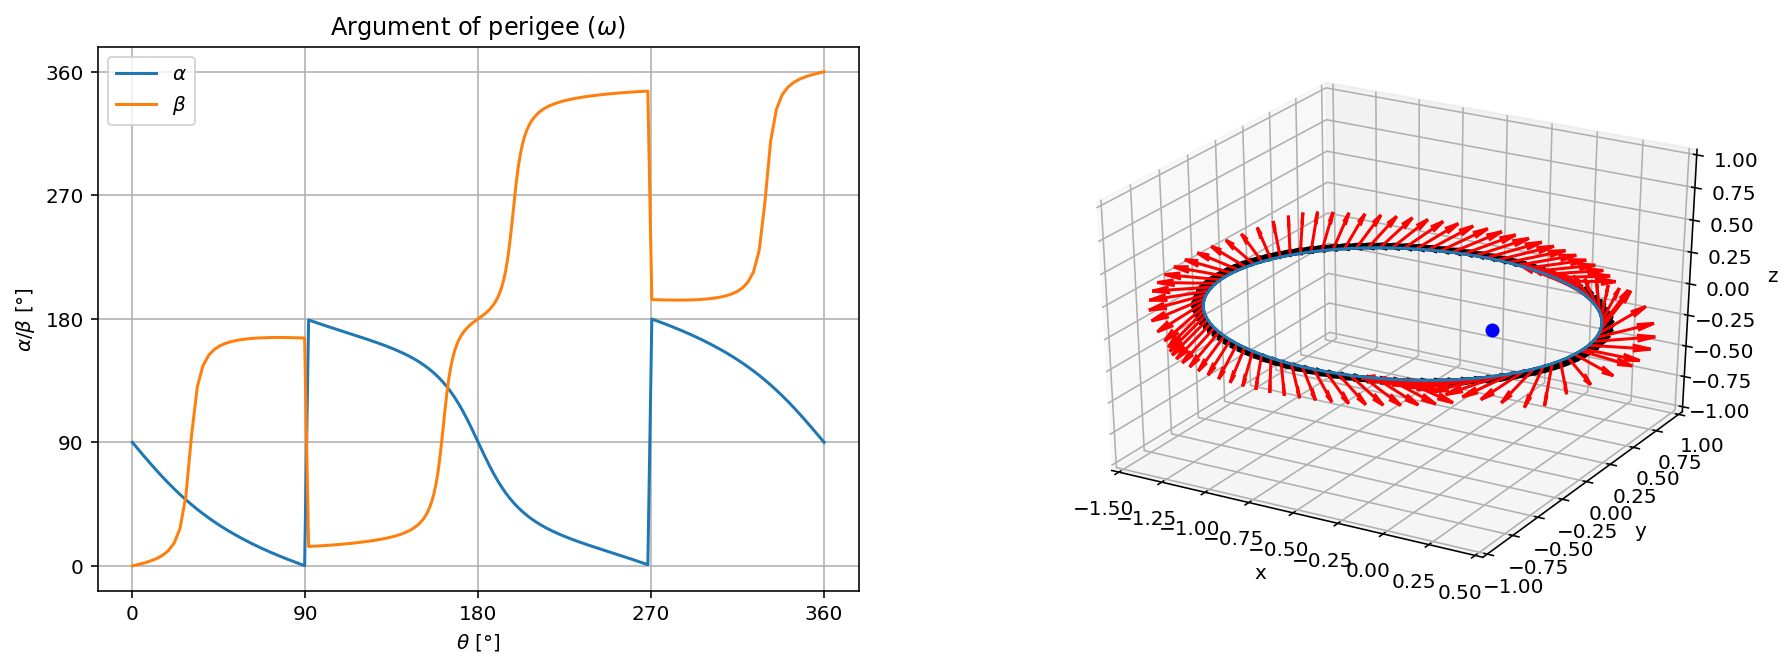

In [63]:
E = np.linspace(0,2*np.pi,200)
e = 0.5
nu = np.arctan2((1-e**2)**0.5*np.sin(E),np.cos(E)-e)
nu = nu+(nu<0)*2*np.pi
omega = 0;
Omega = np.pi/4;
i = np.pi/4;

# Semi-major axis (a)
plt.figure(figsize=(15, 5))
plt.subplot(121)
alpha = np.arctan2(e*np.sin(nu),(1+e*np.cos(nu)));
beta = 0*nu;
plt.plot(nu*180/np.pi,alpha*180/np.pi, label=r"$\alpha$");
plt.plot(nu*180/np.pi,beta*180/np.pi, label=r"$\beta$")
plt.grid()
plt.title("Semi-major axis (a)")
plt.legend()
plt.xlabel(r"$\theta$ [°]")
plt.ylabel(r"$\alpha/\beta$ [°]")
plt.xticks(np.arange(0,361,step=90))
#--
plt.subplot(122)
a = 1;
b = a*(1-e**2)**0.5
r = (a*(1-e**2))/(1+e*np.cos(nu))
x = r*np.cos(nu)
y = r*np.sin(nu)
plt.plot(x,y)
plt.plot(0,0,'bo')
vx = -a*np.sin(E)*np.cos(omega)-b*np.cos(E)*np.sin(omega)
vy = b*np.cos(E)*np.cos(omega)-a*np.sin(E)*np.sin(omega)
plt.quiver(x[::10],y[::10],vx[::10],vy[::10])
vxr = np.sin(alpha)
vyr = np.cos(alpha)
for idx in range(0,len(x)):
    r = np.array([x[idx],y[idx],0])
    v = np.array([vx[idx],vy[idx],0])

    rhat = r/np.linalg.norm(r)
    w = np.cross(rhat,v)
    what = w/np.linalg.norm(w)
    shat = np.cross(what,rhat)
    rsw = [rhat, shat, what]
    v2 = np.dot(np.transpose(rsw),[vxr[idx],vyr[idx],0])
    vxr[idx] = v2[0]
    vyr[idx] = v2[1]

plt.quiver(x[::10],y[::10],vxr[::10],vyr[::10],color='red')
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.savefig("figs/aAngles.svg");
#------------------------------------------------
# Eccentricity (e)
plt.figure(figsize=(15, 5))
plt.subplot(121)
alpha = np.arctan2(np.sin(nu),(np.cos(nu)+np.cos(E)));
alpha = alpha + (alpha < 0)*2*np.pi;
beta = 0*nu;
plt.plot(nu*180/np.pi,alpha*180/np.pi, label=r"$\alpha$");
plt.plot(nu*180/np.pi,beta*180/np.pi, label=r"$\beta$")
plt.grid()
plt.title("Eccentricity (e)")
plt.legend()
plt.xlabel(r"$\theta$ [°]")
plt.ylabel(r"$\alpha/\beta$ [°]")
plt.xticks(np.arange(0,361,step=90))
plt.yticks(np.arange(0,361,step=90))
#--
plt.subplot(122)
a = 1;
b = a*(1-e**2)**0.5
r = (a*(1-e**2))/(1+e*np.cos(nu))
x = r*np.cos(nu)
y = r*np.sin(nu)
plt.plot(x,y)
plt.plot(0,0,'bo')
vx = -a*np.sin(E)*np.cos(omega)-b*np.cos(E)*np.sin(omega)
vy = b*np.cos(E)*np.cos(omega)-a*np.sin(E)*np.sin(omega)
plt.quiver(x[::10],y[::10],vx[::10],vy[::10])
vxr = np.sin(alpha)
vyr = np.cos(alpha)
for idx in range(0,len(x)):
    r = np.array([x[idx],y[idx],0])
    v = np.array([vx[idx],vy[idx],0])

    rhat = r/np.linalg.norm(r)
    w = np.cross(rhat,v)
    what = w/np.linalg.norm(w)
    shat = np.cross(what,rhat)
    rsw = [rhat, shat, what]
    v2 = np.dot(np.transpose(rsw),[vxr[idx],vyr[idx],0])
    vxr[idx] = v2[0]
    vyr[idx] = v2[1]
plt.quiver(x[::10],y[::10],vxr[::10],vyr[::10],color='red')
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.savefig("figs/eAngles.svg");
#--------------------------------------------------
# Inclination (i)
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 2, 1)
alpha = 0*nu;
beta = np.sign(np.cos(omega+nu))*np.pi/2;
beta = beta + (beta < 0)*2*np.pi;
ax.plot(nu*180/np.pi,alpha*180/np.pi, label=r"$\alpha$");
ax.plot(nu*180/np.pi,beta*180/np.pi, label=r"$\beta$")
ax.grid()
plt.xlabel(r"$\theta$ [°]")
plt.ylabel(r"$\alpha/\beta$ [°]")
plt.title("Inclination (i)")
ax.legend()
plt.xticks(np.arange(0,361,step=90))
plt.yticks(np.arange(0,361,step=90))
#--
i2 = i
Omega2 = Omega

i = 0
Omega = 0
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_xlim3d(-1.5,0.5)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)
a = 1;
b = a*(1-e**2)**0.5
r = (a*(1-e**2))/(1+e*np.cos(nu))
x = r*np.cos(nu)*(np.cos(omega)*np.cos(Omega)-np.sin(omega)*np.cos(i)*np.sin(Omega))-r*np.sin(nu)*(np.sin(omega)*np.cos(Omega)+np.cos(omega)*np.cos(i)*np.sin(Omega))
y = r*np.cos(nu)*(np.cos(omega)*np.sin(Omega)+np.sin(omega)*np.cos(i)*np.cos(Omega))+r*np.sin(nu)*(np.cos(omega)*np.cos(i)*np.cos(Omega)-np.sin(omega)*np.sin(Omega))
z = r*np.cos(nu)*np.sin(omega)*np.sin(i)+r*np.sin(nu)*np.cos(omega)*np.sin(i)
ax.plot3D(x,y,z)
ax.plot3D([0],[0],[0],'bo')

vxf = -a*np.sin(E)
vyf = b*np.cos(E)
vzf = np.zeros(len(E))
vx = vxf*(np.cos(omega)*np.cos(Omega)-np.sin(omega)*np.cos(i)*np.sin(Omega))-vyf*(np.sin(omega)*np.cos(Omega)+np.cos(omega)*np.cos(i)*np.sin(Omega))
vy = vxf*(np.cos(omega)*np.sin(Omega)+np.sin(omega)*np.cos(i)*np.cos(Omega))+vyf*(np.cos(omega)*np.cos(i)*np.cos(Omega)-np.sin(omega)*np.sin(Omega))
vz = vxf*np.sin(omega)*np.sin(i)+vyf*np.cos(omega)*np.sin(i)
ax.quiver(x[::5],y[::5],z[::5],vx[::5],vy[::5],vz[::5],color='black',length=0.3, normalize=True)

omega = omega-alpha
vxr = (vxf*(np.cos(omega)*np.cos(Omega)-np.sin(omega)*np.cos(i)*np.sin(Omega))-vyf*(np.sin(omega)*np.cos(Omega)+np.cos(omega)*np.cos(i)*np.sin(Omega)))*np.cos(beta)
vyr = (vxf*(np.cos(omega)*np.sin(Omega)+np.sin(omega)*np.cos(i)*np.cos(Omega))+vyf*(np.cos(omega)*np.cos(i)*np.cos(Omega)-np.sin(omega)*np.sin(Omega)))*np.cos(beta)
vzr = np.sin(beta)
ax.quiver(x[::5],y[::5],z[::5], vxr[::5],vyr[::5], vzr[::5],color='red',length=0.3, normalize=True);
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.savefig("figs/iAngles.svg");
plt.show()

i = i2
Omega = Omega2
#--------------------------------------------------
# RAAN (Omega)
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 2, 1)
alpha = 0*nu;
beta = np.sign(np.sin(omega+nu))*np.pi/2;
beta = beta + (beta < 0)*2*np.pi;
ax.plot(nu*180/np.pi,alpha*180/np.pi, label=r"$\alpha$");
ax.plot(nu*180/np.pi,beta*180/np.pi, label=r"$\beta$")
ax.grid()
plt.title("RAAN ($\Omega$)")
ax.legend()
plt.xlabel(r"$\theta$ [°]")
plt.ylabel(r"$\alpha/\beta$ [°]")
plt.xticks(np.arange(0,361,step=90))
plt.yticks(np.arange(0,361,step=90))
#--
i2 = i
Omega2 = Omega
i = 30*np.pi/180
Omega = 0
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_xlim3d(-1.5,0.5)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)
a = 1;
b = a*(1-e**2)**0.5
r = (a*(1-e**2))/(1+e*np.cos(nu))
x = r*np.cos(nu)*(np.cos(omega)*np.cos(Omega)-np.sin(omega)*np.cos(i)*np.sin(Omega))-r*np.sin(nu)*(np.sin(omega)*np.cos(Omega)+np.cos(omega)*np.cos(i)*np.sin(Omega))
y = r*np.cos(nu)*(np.cos(omega)*np.sin(Omega)+np.sin(omega)*np.cos(i)*np.cos(Omega))+r*np.sin(nu)*(np.cos(omega)*np.cos(i)*np.cos(Omega)-np.sin(omega)*np.sin(Omega))
z = r*np.cos(nu)*np.sin(omega)*np.sin(i)+r*np.sin(nu)*np.cos(omega)*np.sin(i)
ax.plot3D(x,y,z)
ax.plot3D([0],[0],[0],'bo')

vxf = -a*np.sin(E)
vyf = b*np.cos(E)
vzf = np.zeros(len(E))
vx = vxf*(np.cos(omega)*np.cos(Omega)-np.sin(omega)*np.cos(i)*np.sin(Omega))-vyf*(np.sin(omega)*np.cos(Omega)+np.cos(omega)*np.cos(i)*np.sin(Omega))
vy = vxf*(np.cos(omega)*np.sin(Omega)+np.sin(omega)*np.cos(i)*np.cos(Omega))+vyf*(np.cos(omega)*np.cos(i)*np.cos(Omega)-np.sin(omega)*np.sin(Omega))
vz = vxf*np.sin(omega)*np.sin(i)+vyf*np.cos(omega)*np.sin(i)
ax.quiver(x[::5],y[::5],z[::5],vx[::5],vy[::5],vz[::5],color='black',length=0.3, normalize=True)

omega = omega-alpha
vxr = (vxf*(np.cos(omega)*np.cos(Omega)-np.sin(omega)*np.cos(i)*np.sin(Omega))-vyf*(np.sin(omega)*np.cos(Omega)+np.cos(omega)*np.cos(i)*np.sin(Omega)))*np.cos(beta)
vyr = (vxf*(np.cos(omega)*np.sin(Omega)+np.sin(omega)*np.cos(i)*np.cos(Omega))+vyf*(np.cos(omega)*np.cos(i)*np.cos(Omega)-np.sin(omega)*np.sin(Omega)))*np.cos(beta)
#vzr = (vxrf*np.sin(omega)*np.sin(i)+vyrf*np.cos(omega)*np.sin(i))
vzr = np.sin(beta)

ax.quiver(x[::5],y[::5],z[::5], vxr[::5],vyr[::5], vzr[::5],color='red',length=0.3, normalize=True);
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.savefig("figs/RAANAngles.svg");
plt.show()
i = i2
Omega = Omega2
#--------------------------------------------------
# Argument of Perigee (omega)
#nu = np.linspace(0.1,2*np.pi,200)
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 2, 1)
alpha = np.arctan2(1+e*np.cos(nu),(2+e*np.cos(nu))*np.tan(nu));
alpha = alpha + (alpha < 0)*2*np.pi;
beta = np.arctan2(e*np.sin(omega+nu),np.tan(i)*(np.sin(alpha-nu)*(1+e*np.cos(nu))-np.cos(alpha)*np.sin(nu)));
beta = beta + (beta < 0)*2*np.pi;
ax.plot(nu*180/np.pi,alpha*180/np.pi, label=r"$\alpha$");
ax.plot(nu*180/np.pi,beta*180/np.pi, label=r"$\beta$")
ax.grid()
ax.legend();
plt.xlabel(r"$\theta$ [°]")
plt.ylabel(r"$\alpha/\beta$ [°]")
plt.title("Argument of perigee ($\omega$)");
plt.xticks(np.arange(0,361,step=90));
plt.yticks(np.arange(0,361,step=90));
#--
i = 0
Omega = 0
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_xlim3d(-1.5,0.5)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)
a = 1;
b = a*(1-e**2)**0.5
r = (a*(1-e**2))/(1+e*np.cos(nu))
x = r*np.cos(nu)*(np.cos(omega)*np.cos(Omega)-np.sin(omega)*np.cos(i)*np.sin(Omega))-r*np.sin(nu)*(np.sin(omega)*np.cos(Omega)+np.cos(omega)*np.cos(i)*np.sin(Omega))
y = r*np.cos(nu)*(np.cos(omega)*np.sin(Omega)+np.sin(omega)*np.cos(i)*np.cos(Omega))+r*np.sin(nu)*(np.cos(omega)*np.cos(i)*np.cos(Omega)-np.sin(omega)*np.sin(Omega))
z = r*np.cos(nu)*np.sin(omega)*np.sin(i)+r*np.sin(nu)*np.cos(omega)*np.sin(i)
ax.plot3D(x,y,z)
ax.plot3D([0],[0],[0],'bo')

vxf = -a*np.sin(E)
vyf = b*np.cos(E)
vzf = np.zeros(len(E))
vx = vxf*(np.cos(omega)*np.cos(Omega)-np.sin(omega)*np.cos(i)*np.sin(Omega))-vyf*(np.sin(omega)*np.cos(Omega)+np.cos(omega)*np.cos(i)*np.sin(Omega))
vy = vxf*(np.cos(omega)*np.sin(Omega)+np.sin(omega)*np.cos(i)*np.cos(Omega))+vyf*(np.cos(omega)*np.cos(i)*np.cos(Omega)-np.sin(omega)*np.sin(Omega))
vz = vxf*np.sin(omega)*np.sin(i)+vyf*np.cos(omega)*np.sin(i)

ax.quiver(x[::2],y[::2],z[::2],vx[::2],vy[::2],vz[::2],color='black',length=0.3, normalize=True)

omega = omega-alpha
vxr = (vxf*(np.cos(omega)*np.cos(Omega)-np.sin(omega)*np.cos(i)*np.sin(Omega))-vyf*(np.sin(omega)*np.cos(Omega)+np.cos(omega)*np.cos(i)*np.sin(Omega)))*np.cos(beta)
vyr = (vxf*(np.cos(omega)*np.sin(Omega)+np.sin(omega)*np.cos(i)*np.cos(Omega))+vyf*(np.cos(omega)*np.cos(i)*np.cos(Omega)-np.sin(omega)*np.sin(Omega)))*np.cos(beta)
vzr = np.sin(beta)

vxr = np.sin(alpha)
vyr = np.cos(alpha)
for idx in range(0,len(x)):
    r = np.array([x[idx],y[idx],z[idx]])
    v = np.array([vx[idx],vy[idx],z[idx]])

    rhat = r/np.linalg.norm(r)
    w = np.cross(rhat,v)
    what = w/np.linalg.norm(w)
    shat = np.cross(what,rhat)
    rsw = [rhat, shat, what]
    v2 = np.dot(np.transpose(rsw),[vxr[idx],vyr[idx],vzr[idx]])
    vxr[idx] = v2[0]
    vyr[idx] = v2[1]
    vzr[idx] = v2[2]

ax.quiver(x[::2],y[::2],z[::2], vxr[::2],vyr[::2], vzr[::2],color='red',length=0.3, normalize=True);
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.savefig("figs/omegaAngles.svg");
plt.show()

#--------------------------------------------------